DSCI 352 Tara Erberich Student ID: 9237580532

1a
Download the YouTube Spam Collection data set. We will mainly work with
the Eminem file. Note that the chronological order of the comments were kept. (0 = ham & 1 = spam)
(5 pts)

In [311]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, confusion_matrix, classification_report  
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import GaussianNB



# read in data
data = pd.read_csv('YouTube-Spam-Collection-v1/Youtube04-Eminem.csv')


#print(data['CONTENT'].tolist())
#print(data['CLASS'])

1c Represent each comment using TF-IDF features. Consider each comment a document and the whole set of comments in the file (e.g. Eminem) as the corpus. Do NOT remove stop words.(10 pts)

In [312]:
# Vectorize all the data

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['CONTENT'])
print(vectorizer.get_feature_names())
print(x.shape)
x2 = pd.DataFrame(x.toarray())



['00', '000', '047000', '09', '10', '100', '1000', '100877300245414', '11', '12', '12year', '1337', '14', '15', '16', '17', '17yr', '18', '19', '1990', '1b', '1billion', '200', '2005', '2008', '200k', '2010', '2013', '2014', '2015', '21', '23', '23active', '23awesome', '23eminem', '23king', '23lovethewayyoulie', '23rapgod', '23rt', '23share', '25', '26', '26t22', '28', '2asfn9shghk', '2b4wywphi8c', '2nd', '2zme8f', '30', '31st', '365', '36loseweight', '39', '3rd', '4000', '4000dollars', '41', '43', '447935454150', '45', '46', '476000', '482', '490', '4e', '4th', '50', '500', '500k', '5tu9gn1l310', '60', '600', '600m', '613000', '6_h0m5sayho', '710000', '7k', '800', '832000', '857', '87', '90', '940', 'abbas', 'ablaze', 'about', 'above', 'absolutely', 'abuse', 'abuses', 'abusive', 'abusue', 'acaer', 'acceptance', 'accidental', 'accomplished', 'achieve', 'across', 'act', 'activates', 'active', 'actual', 'actually', 'ad', 'adam', 'adapt', 'adhoc', 'admitting', 'adult', 'advance', 'adverti

1b
Select the first [0.8H] of H hams and the first [0.8S] of S spams as your training set and the rest as your test set. (10 pts)

In [321]:
# add class column to transformed data
x2['CLASS'] = data['CLASS']
data = x2
#print(data)

# find hams
hams = data[data['CLASS'] == 0]

# find 80%
percentHam = round(len(hams)*.8)

# split hams
firstHam = hams[0:percentHam]
lastHam = hams[percentHam:]


# find spam
spam = data[data['CLASS'] == 1]

# find 80%
percentSpam = round(len(spam)*.8)


# split spam
firstSpam = spam[0:percentSpam]
lastSpam = spam[percentSpam:]



# concat training set
training = [firstHam, firstSpam]
training = pd.concat(training)

# get x data
x_train = training.iloc[:, 0:1602]
# get y data
y_train = training['CLASS']

    
# concat test set  
testing = [lastHam, lastSpam]
testing = pd.concat(testing)

# get x data
x_test = testing.iloc[:, 0:1602]
# get y data
y_test = testing['CLASS']

print(x_test, y_test)
print(x_train, y_train)

     0     1     2     3     4     5         6     7     8     9     ...  \
370   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
371   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
374   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
381   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
385   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
..    ...   ...   ...   ...   ...   ...       ...   ...   ...   ...  ...   
440   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
442   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
443   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
444   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
445   0.0   0.0   0.0   0.0   0.0   0.0  0.113348   0.0   0.0   0.0  ...   

     1592  1593  1594      1595  1596  1597  1598  1599  1600  1601  
370   0.0   0.0  

1d.i
Determine [v] using five fold cross-validation on your training set. Consider log10[v] {-5,-4,...,5} (5 pts)

In [314]:
# create lambda values
c = [1/pow(10,i) for i in range(-5,6)]
print(c)

[99999.99999999999, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05]


1d.ii
Train L2-penalized Logistic Regression using the [v] you found in 1(e)i. Calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for your training set. (10 pts)

Best C 
 100.0


Train AUC 
 1.0


Train Roc_Curve
 [0. 0. 1.] [0. 1. 1.]


Train CF Matrix
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       196

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



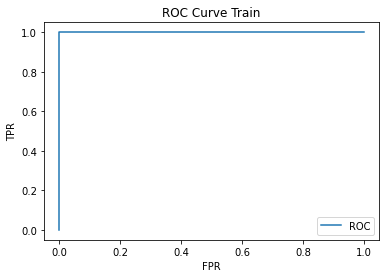

In [315]:
# log regression
log = linear_model.LogisticRegression()

# L2
penalty = ['l2']

# create parameters(solver stays at default)
param = {"C" : c,
        "penalty": penalty}

# cross validation 5 fold
gridCV = GridSearchCV(log, param, cv = 5, n_jobs = -1)

# fit
best_model = gridCV.fit(x_train, y_train)


print('Best C \n', best_model.best_estimator_.get_params()['C'])
print('\n')

# predict
pred_train = best_model.predict(x_train)

# auccuracy 
print('Train AUC \n', metrics.accuracy_score(y_train, pred_train))
print('\n')

# ROC Curve
fpr1, tpr1, _ = roc_curve(y_train, pred_train.reshape(-1,1) , pos_label = 1)
print('Train Roc_Curve\n', fpr1, tpr1)
print('\n')

# Confusion
cf_matrix1=confusion_matrix(y_train,pred_train)
print('Train CF Matrix\n', classification_report(y_train,pred_train) )


# Train ROC Graph
plt.title("ROC Curve Train")
plt.plot(fpr1, tpr1, label ="ROC")
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

1d.iii
Test the algorithm on the test set and calculate the confusion matrix, accuracy,precision, recall, and F1 score as well as the ROC curve and AUC for the test set. Which one is more important in this application, precision or recall? Calculate FB score for B {0.1,0.5,.9,1,5,10} (15 pts)

Test AUC 
 0.9555555555555556


Test Roc_Curve
 [0.         0.93877551 1.        ] [0.         0.93877551 1.        ]


Test CF Matrix
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.98      0.94      0.96        49

    accuracy                           0.96        90
   macro avg       0.95      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



	Beta 0.1 	 Beta 0.5 	 Beta 0.9  	 Beta 1  	 Beta 5  	 Beta 10 
 0.9783112234154558 0.970464135021097 0.9604337293805514 0.9583333333333333 0.9402515723270441 0.9583333333333333


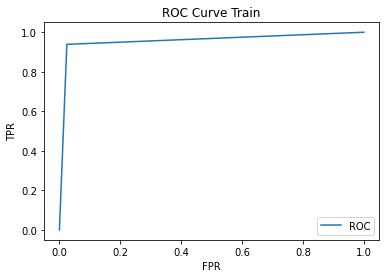

In [322]:

# Predict using test set
#print(best_model.predict(x_test))

pred_test = best_model.predict(x_test)

# Accuracy
print('Test AUC \n', metrics.accuracy_score(y_test, pred_test))
print('\n')

# ROC
fpr1, tpr1, _ = roc_curve(y_test, pred_test.reshape(-1,1) , pos_label = 1)
print('Test Roc_Curve\n', tpr1, tpr1)
print('\n')

# Confusion matrix
cf_matrix1=confusion_matrix(y_test,pred_test)
print('Test CF Matrix\n', classification_report(y_test,pred_test) )
print('\n')

# Test fbeta scores
fb_1 = fbeta_score(y_test, pred_test, beta=0.1)
fb_5 = fbeta_score(y_test, pred_test, beta=0.5)
fb_9 = fbeta_score(y_test, pred_test, beta=0.9)
fb_100 = fbeta_score(y_test, pred_test, beta=1)
fb_50 = fbeta_score(y_test, pred_test, beta=5)
fb_10 = fbeta_score(y_test, pred_test, beta=10)

print('\tBeta 0.1 \t Beta 0.5 \t Beta 0.9  \t Beta 1  \t Beta 5  \t Beta 10 \n', fb_1, fb_5, fb_9, fb_100, fb_50, fb_100)

# Train ROC Graph
plt.title("ROC Curve Train")
plt.plot(fpr1, tpr1, label ="ROC")
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Recall is more important in this instance because we want to know how well our trained model correctly predicts on the test set. Here we have a high recall meaning there is a high rate of correctly classified ham and spam.

1e.i
Determine [v] using five fold cross-validation on your training set. Consider log10 [v] {-5,-4,...5} (5 pts)

In [317]:
# create lambda values
c = [1/pow(10,i) for i in range(-5,6)]
print(c)

[99999.99999999999, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05]


1e.ii
Train L1-penalized Logistic Regression using the  you found in 1(e)i. Calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for your training set. (15 pts)

Best C 
 10000.0


Train AUC 
 1.0


Train Roc_Curve
 [0. 1. 1.] [0. 1. 1.]


Train CF Matrix
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       196

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



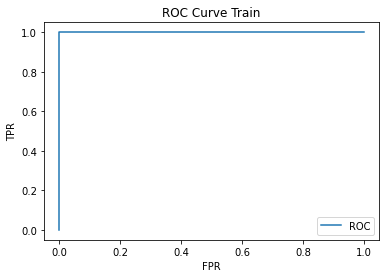

In [318]:
# log regression
log = linear_model.LogisticRegression()
# L1
penalty = ['l1']

# create parameters(needs specific solver for L1)
param = {"C" : c,
        "penalty": penalty,
        "solver": ['liblinear']}

# cross validation 5 fold
gridCV = GridSearchCV(log, param, cv = 5, n_jobs = -1)

# fit
best_model = gridCV.fit(x_train, y_train)

print('Best C \n', best_model.best_estimator_.get_params()['C'])
print('\n')

# predict 
pred_train = best_model.predict(x_train)

# Accuracy
print('Train AUC \n', metrics.accuracy_score(y_train, pred_train))
print('\n')

# ROC Curve
fpr1, tpr1, _ = roc_curve(y_train, pred_train.reshape(-1,1) , pos_label = 1)
print('Train Roc_Curve\n', tpr1, tpr1)
print('\n')

# Confusion Matrix
cf_matrix1=confusion_matrix(y_train,pred_train)
print('Train CF Matrix\n', classification_report(y_train,pred_train) )

# Train ROC Graph
plt.title("ROC Curve Train")
plt.plot(fpr1, tpr1, label ="ROC")
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

1e.iii
Test the algorithm on the test set and calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for the test set. (10 pts)

In [319]:

# Predict with test set
pred_test = best_model.predict(x_test)

# Accuracy 
print('Test AUC \n', metrics.accuracy_score(y_test, pred_test))
print('\n')

# ROC Curve
fpr1, tpr1, _ = roc_curve(y_test, pred_test.reshape(-1,1) , pos_label = 1)
print('Test Roc_Curve\n', tpr1, tpr1)
print('\n')

# Confusion Matrix
cf_matrix1=confusion_matrix(y_test,pred_test)
print('Test CF Matrix\n', classification_report(y_test,pred_test) )




Test AUC 
 0.9555555555555556


Test Roc_Curve
 [0.         0.93877551 1.        ] [0.         0.93877551 1.        ]


Test CF Matrix
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.98      0.94      0.96        49

    accuracy                           0.96        90
   macro avg       0.95      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



1f.i
Binary Classification Using Naive Bayes' Classifiers

i. Solve the problem using a Naaive Bayes' classifier. Use Gaussian class conditional distributions. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets. (15 pts)

Train AUC 
 0.9972067039106145
Test AUC 
 0.9222222222222223


Train Roc_Curve
 [0.         0.99489796 1.        ] [0.         0.99489796 1.        ]
Test Roc_Curve
 [0.         0.97959184 1.        ] [0.         0.97959184 1.        ]


Train CF Matrix
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       162
           1       1.00      0.99      1.00       196

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Test CF Matrix
               precision    recall  f1-score   support

           0       0.97      0.85      0.91        41
           1       0.89      0.98      0.93        49

    accuracy                           0.92        90
   macro avg       0.93      0.92      0.92        90
weighted avg       0.93      0.92      0.92        90



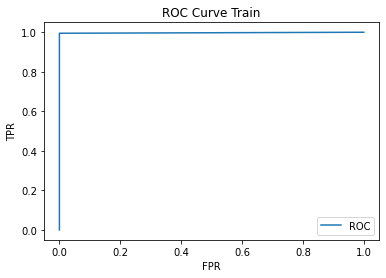

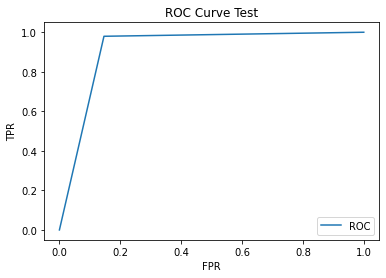

In [320]:

# Navies Bayes Classifier
nb = GaussianNB()

# fit
nb.fit(x_train, y_train)

# predict train and test
pred_train = nb.predict(x_train)
pred_test = nb.predict(x_test)
#print(pred_train, pred_test)

# Train and Test Accuracy
print('Train AUC \n', metrics.accuracy_score(y_train, pred_train))
print('Test AUC \n', metrics.accuracy_score(y_test, pred_test))
print('\n')

# Train and Test ROC Curve
fpr1, tpr1, _ = roc_curve(y_train, pred_train.reshape(-1,1) , pos_label = 1)
print('Train Roc_Curve\n', tpr1, tpr1)
fpr2, tpr2, _ = roc_curve(y_test, pred_test.reshape(-1,1) , pos_label = 1)
print('Test Roc_Curve\n', tpr2, tpr2)
print('\n')

# Train and Test Confusion Matrix
cf_matrix1=confusion_matrix(y_train,pred_train)
print('Train CF Matrix\n', classification_report(y_train,pred_train) )
cf_matrix1=confusion_matrix(y_test,pred_test)
print('Test CF Matrix\n', classification_report(y_test,pred_test) )

# Train ROC Graph
plt.title("ROC Curve Train")
plt.plot(fpr1, tpr1, label ="ROC")
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Test ROC Graph
plt.title("ROC Curve Test")
plt.plot(fpr2, tpr2, label ="ROC")
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()